<a href="https://colab.research.google.com/github/Dr-Admon/exani_ideal/blob/main/AnalysisExani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

diagnostico = "https://raw.githubusercontent.com/Dr-Admon/exani_ideal/refs/heads/main/ThirdGer/diag.csv"

df = pd.read_csv(diagnostico)
df

,Apellido(s),Nombre,Dirección Email,Estado,Comenzado en,Finalizado,Tiempo empleado,Calificación/40,Q. 1 /1,Q. 2 /1,...,Q. 31 /1,Q. 32 /1,Q. 33 /1,Q. 34 /1,Q. 35 /1,Q. 36 /1,Q. 37 /1,Q. 38 /1,Q. 39 /1,Q. 40 /1
0,Jiménez Ávila,Mariana Guadalupe,mjimenezavila996@gmail.com,Terminado,10 de marzo de 2025 12:58,10 de marzo de 2025 13:45,46 mins 25 segundos,28,1,1,...,1,1,1,1,0,1,1,0,1,1
1,Hernández Ramírez,Jair Alejandro,jairhernandez031677@gmail.com,Terminado,10 de marzo de 2025 13:21,10 de marzo de 2025 13:53,31 mins 39 segundos,21,1,1,...,1,0,1,0,0,1,0,0,1,1
2,Estrada Ávila,Mía Lizeth,mializethestradaavila@gmail.com,Terminado,10 de marzo de 2025 13:32,10 de marzo de 2025 14:28,56 mins 4 segundos,21,1,1,...,1,0,0,1,0,1,0,0,0,0
3,Hernández Rodríguez,Diego Karim,karimhernadezrod@gmail.com,Terminado,10 de marzo de 2025 17:37,10 de marzo de 2025 18:32,54 mins 48 segundos,24,1,1,...,0,1,1,1,1,1,0,0,0,1
4,Aguilar Zuñiga,Ilse Abigail,abipolar09@gmail.com,Terminado,10 de marzo de 2025 17:55,10 de marzo de 2025 18:55,1 hora,22,0,1,...,1,1,0,0,0,1,0,0,0,0
5,Álvarez Ramírez,Valeria Abigail,valeriaabigailalvarezramirez@gmail.com,Terminado,10 de marzo de 2025 18:40,10 de marzo de 2025 19:40,1 hora,21,0,-,...,1,1,1,1,0,1,1,0,0,0
6,Bentacourt García,Diego,dieg0.obby12@gmail.com,Terminado,10 de marzo de 2025 19:46,10 de marzo de 2025 20:23,36 mins 53 segundos,29,1,1,...,1,1,1,1,1,1,0,0,0,0
7,Aguilar Arreola,Natan Abraham,natanabraham543@gmail.com,Terminado,10 de marzo de 2025 20:52,10 de marzo de 2025 21:19,26 mins 54 segundos,26,0,1,...,0,0,0,0,1,1,1,0,1,1


In [3]:
def obten_num(x):
  s = ''
  for i in x:
    if i.isnumeric():
      s += i
    if i=='/':
      break
  return s

obten_num('Q. 5/1')

'5'

In [4]:
etiquetas = 'Jerarquia de operaciones,'*8 +'Proporcionalidad,'*8 + 'Expresiones Algebraicas,'*8 + 'Productos Notables,'*8 + 'Ecuaciones,'*8
# etiquetas = 'Algebra,'*10 + 'Funciones,'*10 + 'Trigonometria,'*10

etiquetas = etiquetas.split(',')
etiquetas.pop()
preguntas = df.columns[8:]
apellidos = df['Apellido(s)']
nombres = df['Nombre']
new = []
for i, name in enumerate(nombres):
  for j, pregunta in enumerate(preguntas):
    new.append([name, apellidos[i], pregunta, etiquetas[j], df[pregunta][i]])

df_new = pd.DataFrame(new, columns=['Nombre', 'Apellido', 'Pregunta', 'Etiqueta', 'Resultado'])

df_new['Pregunta'] = df_new['Pregunta'].apply(lambda x: obten_num(x))
df_new['Resultado'] = pd.to_numeric(df_new['Resultado'], errors='coerce')
df_new.Resultado = list(df_new.Resultado.fillna(0))

df_new

,Nombre,Apellido,Pregunta,Etiqueta,Resultado
0,Mariana Guadalupe,Jiménez Ávila,1,Jerarquia de operaciones,1.0
1,Mariana Guadalupe,Jiménez Ávila,2,Jerarquia de operaciones,1.0
2,Mariana Guadalupe,Jiménez Ávila,3,Jerarquia de operaciones,1.0
3,Mariana Guadalupe,Jiménez Ávila,4,Jerarquia de operaciones,1.0
4,Mariana Guadalupe,Jiménez Ávila,5,Jerarquia de operaciones,1.0
...,...,...,...,...,...
315,Natan Abraham,Aguilar Arreola,36,Ecuaciones,1.0
316,Natan Abraham,Aguilar Arreola,37,Ecuaciones,1.0
317,Natan Abraham,Aguilar Arreola,38,Ecuaciones,0.0
318,Natan Abraham,Aguilar Arreola,39,Ecuaciones,1.0


In [5]:
df_new.Resultado.unique()
df_new.Resultado = df_new.Resultado.map(lambda x: int(x>0))

In [6]:
Calificaciones = pd.DataFrame(df_new.groupby('Nombre')['Resultado'].sum())
Calificaciones.sort_values(by='Resultado', ascending=False, inplace=True)
Calificaciones['Calificacion'] = Calificaciones.Resultado * 100 / preguntas.size
Calificaciones

,Resultado,Calificacion
Nombre,,
Diego,29,72.5
Mariana Guadalupe,28,70.0
Natan Abraham,26,65.0
Diego Karim,24,60.0
Ilse Abigail,22,55.0
Jair Alejandro,21,52.5
Mía Lizeth,21,52.5
Valeria Abigail,21,52.5


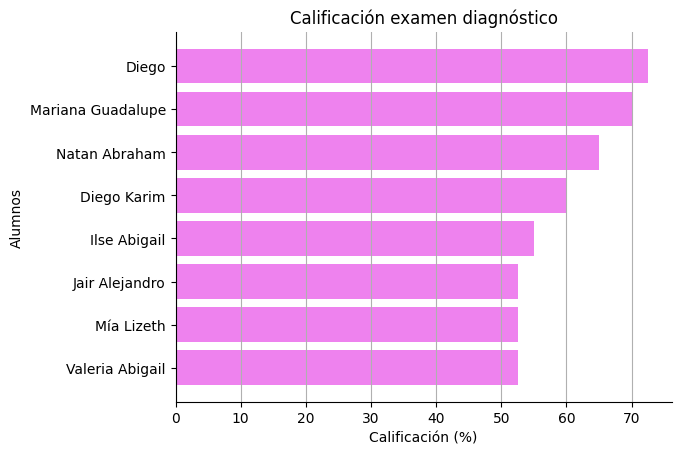

In [7]:
import matplotlib.pyplot as plt

# Crear gráfico de barras horizontales
plt.barh(
    Calificaciones.index,
    Calificaciones['Calificacion'],
    color='violet'
    )
plt.gca().invert_yaxis()

# Configurar etiquetas del eje x y
plt.xlabel('Calificación (%)')
plt.ylabel('Alumnos')
plt.title('Calificación examen diagnóstico')
ax = plt.gca()
ax.spines['top'].set_visible(False)  # Desactiva el borde superior
ax.spines['right'].set_visible(False)  # Desactiva el borde derecho
plt.grid(axis='x')
plt.show()


In [8]:

Preguntas = pd.DataFrame(df_new.groupby('Pregunta')['Resultado'].sum())
Preguntas.sort_values(by='Resultado', ascending=True, inplace=True)
Preguntas['Fallas'] = Calificaciones.shape[0] - Preguntas['Resultado']
Preguntas['Porcentaje acumulado'] = Preguntas['Fallas'].cumsum() / Preguntas['Fallas'].sum() * 100
Preguntas

,Resultado,Fallas,Porcentaje acumulado
Pregunta,,,
38,0,8,6.25000
24,1,7,11.71875
17,1,7,17.18750
30,1,7,22.65625
26,2,6,27.34375
21,2,6,32.03125
35,3,5,35.93750
10,3,5,39.84375
23,3,5,43.75000


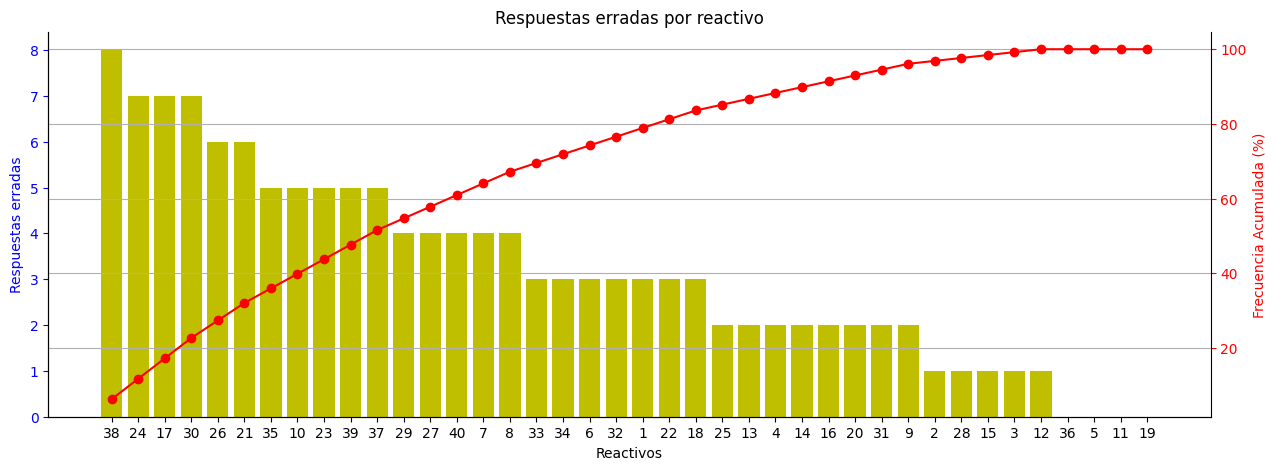

In [9]:
import matplotlib.pyplot as plt

# Crear el gráfico de Pareto
fig, ax1 = plt.subplots()

# Barras
ax1.bar(Preguntas.index, Preguntas.Fallas, color='y')
ax1.set_xlabel('Reactivos')
ax1.set_ylabel('Respuestas erradas', color='b')
ax1.tick_params('y', colors='b')
fig.set_size_inches((15,5))

# Línea acumulativa
ax2 = ax1.twinx()
ax2.plot(Preguntas.index, Preguntas['Porcentaje acumulado'], color='r', marker='o')
ax2.set_ylabel('Frecuencia Acumulada (%)', color='r')
ax2.tick_params('y', colors='r')

ax1.spines['top'].set_visible(False)  # Desactiva el borde superior
ax1.spines['right'].set_visible(False)  # Desactiva el borde derecho

ax2.spines['top'].set_visible(False)  # Desactiva el borde superior

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Configurar el título
plt.title('Respuestas erradas por reactivo')
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [55]:
Temas_1 = pd.DataFrame(df_new.groupby('Etiqueta')['Resultado'].sum())
Temas_2 = pd.DataFrame(df_new.groupby('Etiqueta')['Resultado'].count())
Temas = pd.concat([Temas_1, Temas_2], axis=1)
Temas.columns = ['Resultado', 'Cantidad']
Temas.sort_values(by='Resultado', ascending=False, inplace=True)
Temas['Porcentaje'] = Temas['Resultado'] * 100 / Temas['Cantidad']
Temas

,Resultado,Cantidad,Porcentaje
Etiqueta,,,
Proporcionalidad,49,64,76.5625
Jerarquia de operaciones,46,64,71.8750
Productos Notables,35,64,54.6875
Ecuaciones,31,64,48.4375
Expresiones Algebraicas,31,64,48.4375


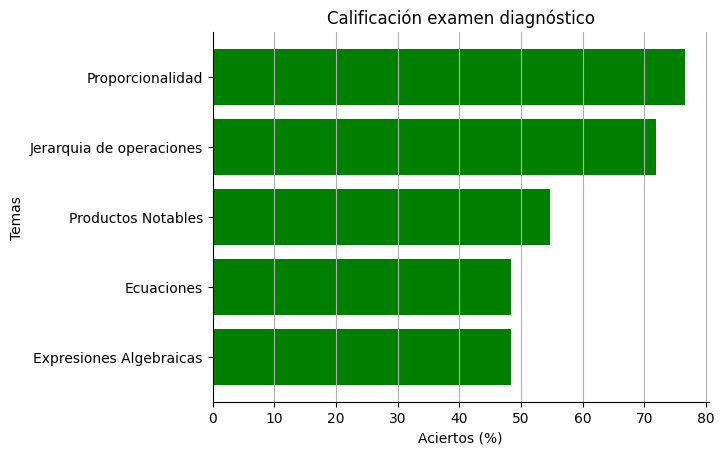

In [56]:
import matplotlib.pyplot as plt
import numpy as np
# Crear gráfico de barras horizontales
plt.barh(
    Temas.index,
    Temas['Porcentaje'],
    color='green'
    )
plt.gca().invert_yaxis()

# Configurar etiquetas del eje x y
plt.xlabel('Aciertos (%)')
plt.ylabel('Temas')
plt.title('Calificación examen diagnóstico')
plt.grid(axis='x')
ax = plt.gca()
ax.spines['top'].set_visible(False)  # Desactiva el borde superior
ax.spines['right'].set_visible(False)  # Desactiva el borde derecho
plt.show()

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def web_grafic(categorias, valores, titulo):

  # Convertir valores a formato polar
  N = len(categorias)
  valores += valores[:1]  # Repetir el primer valor al final para cerrar la telaraña
  angulos = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
  angulos += angulos[:1]

  # Crear la figura y el gráfico de telaraña
  fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
  ax.fill(angulos, valores, color='b', alpha=0.3)  # Relleno del área
  ax.plot(angulos, valores, color='b', linewidth=2)  # Línea de la telaraña

  # Configurar etiquetas
  ax.set_xticks(angulos[:-1])
  ax.set_xticklabels(categorias)
  ax.set_title(titulo, loc='left')
  ax.set_yticks([20, 40, 60, 80, 100])

  # Mostrar el gráfico
  plt.show()

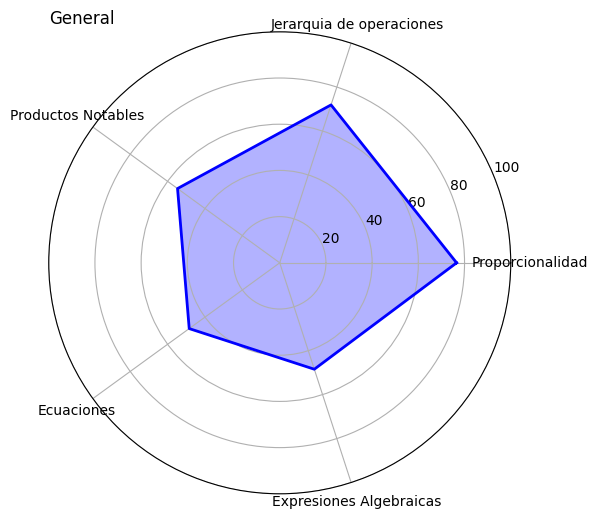

In [60]:
web_grafic(list(Temas.index), list(Temas['Porcentaje']), 'General')

In [13]:
nombre_etiqueta = pd.DataFrame(df_new.groupby(['Nombre', 'Etiqueta'])['Resultado'].sum())
nombre_etiqueta_count = pd.DataFrame(df_new.groupby(['Nombre', 'Etiqueta'])['Resultado'].count())
nombre_etiqueta = pd.concat([nombre_etiqueta, nombre_etiqueta_count], axis=1)
nombre_etiqueta.columns = ['Resultado', 'Cantidad']
nombre_etiqueta['Porcentaje'] = nombre_etiqueta['Resultado'] * 100 / nombre_etiqueta['Cantidad']
nombre_etiqueta.reset_index(inplace=True)
nombre_etiqueta

,Nombre,Etiqueta,Resultado,Cantidad,Porcentaje
0,Diego,Ecuaciones,4,8,50.0
1,Diego,Expresiones Algebraicas,4,8,50.0
2,Diego,Jerarquia de operaciones,8,8,100.0
3,Diego,Productos Notables,6,8,75.0
4,Diego,Proporcionalidad,7,8,87.5
5,Diego Karim,Ecuaciones,5,8,62.5
6,Diego Karim,Expresiones Algebraicas,2,8,25.0
7,Diego Karim,Jerarquia de operaciones,8,8,100.0
8,Diego Karim,Productos Notables,2,8,25.0
9,Diego Karim,Proporcionalidad,7,8,87.5


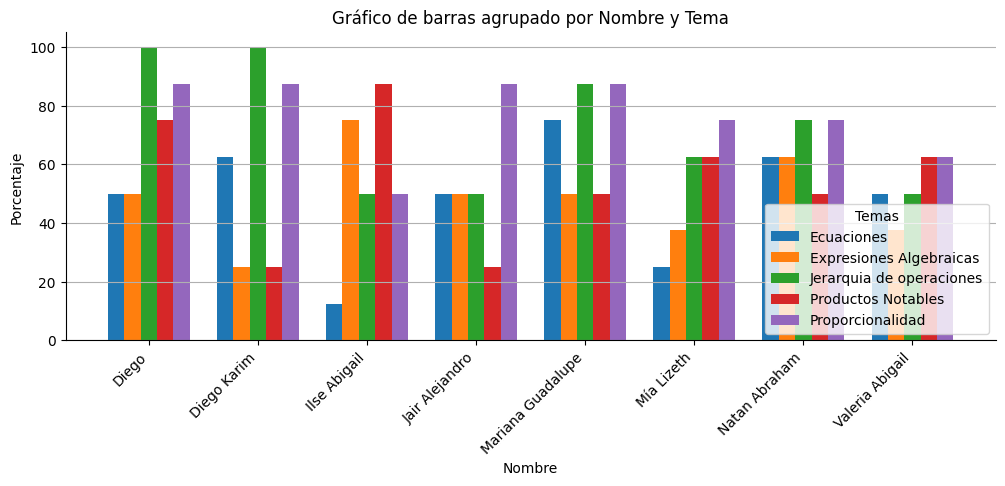

<Figure size 3200x2400 with 0 Axes>

In [14]:
# Configuración del gráfico de barras agrupado
fig, ax = plt.subplots(figsize=(12, 4))

# Definir los nombres y etiquetas únicas
nombres = nombre_etiqueta['Nombre'].unique()
etiquetas = nombre_etiqueta['Etiqueta'].unique()
bar_width = 0.15  # Ancho de cada grupo de barras
x = np.arange(len(nombres))  # Posiciones para cada nombre en el gráfico

# Crear un conjunto de barras para cada etiqueta
for i, etiqueta in enumerate(etiquetas):
    valores = nombre_etiqueta[nombre_etiqueta['Etiqueta'] == etiqueta].set_index('Nombre').loc[nombres, 'Porcentaje']
    ax.bar(x + i * bar_width, valores, bar_width, label=etiqueta)

plt.figure(dpi=500)
# Configuración de etiquetas y títulos
ax.set_xlabel('Nombre')
ax.set_ylabel('Porcentaje')
ax.set_title('Gráfico de barras agrupado por Nombre y Tema')
ax.set_xticks(x + bar_width * (len(etiquetas) - 1) / 2)
ax.set_xticklabels(nombres, rotation=45, ha='right')
ax.legend(title='Temas', loc='lower right')

# Ajustar el espacio entre subplots
ax.spines['top'].set_visible(False)  # Desactiva el borde superior
ax.spines['right'].set_visible(False)  # Desactiva el borde derecho
ax.grid(axis='y')

# Mostrar el gráfico

plt.tight_layout()
plt.show()

<ipython-input-46-c00b9bb7efed>:12: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  valores[nombre].append(int(value.loc[value.Etiqueta == categoria, "Porcentaje"]))


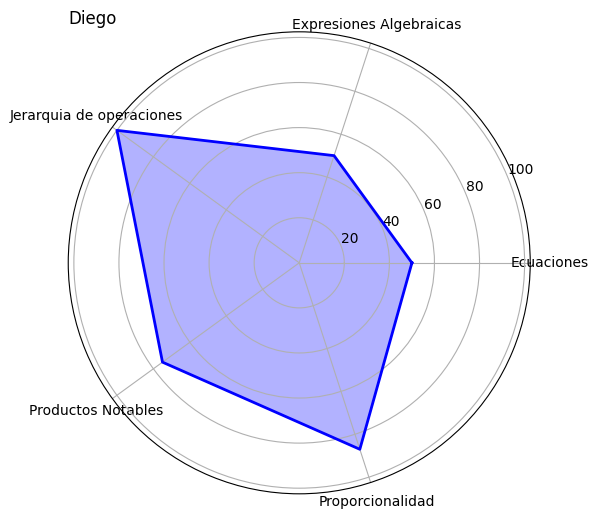

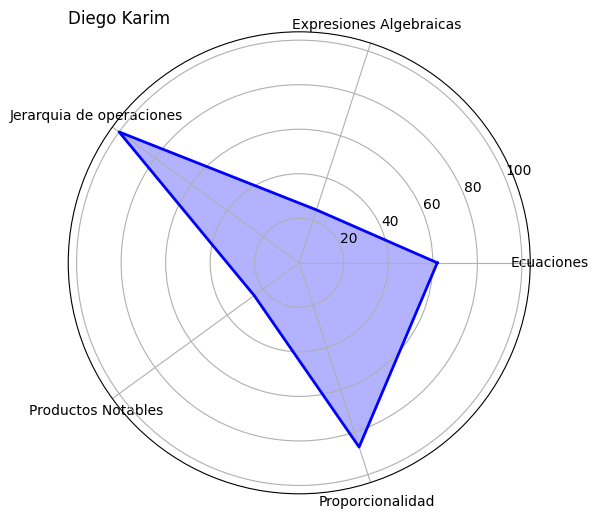

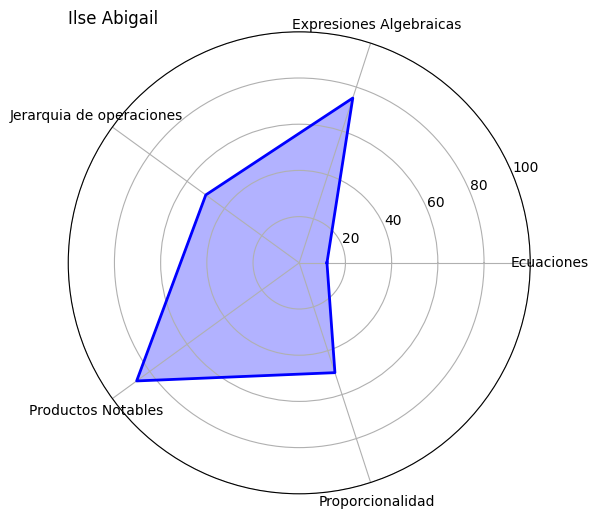

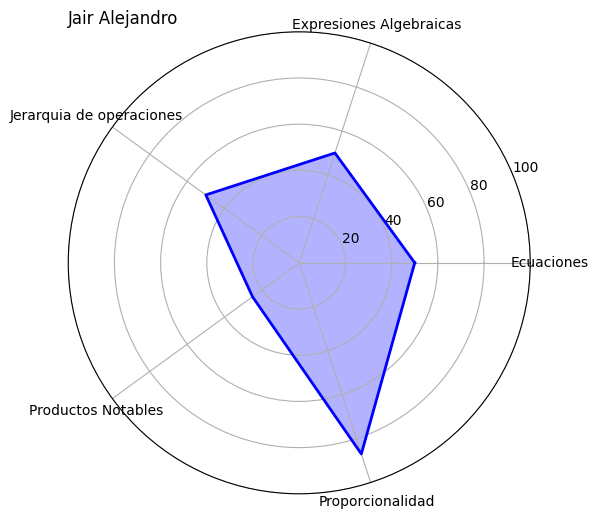

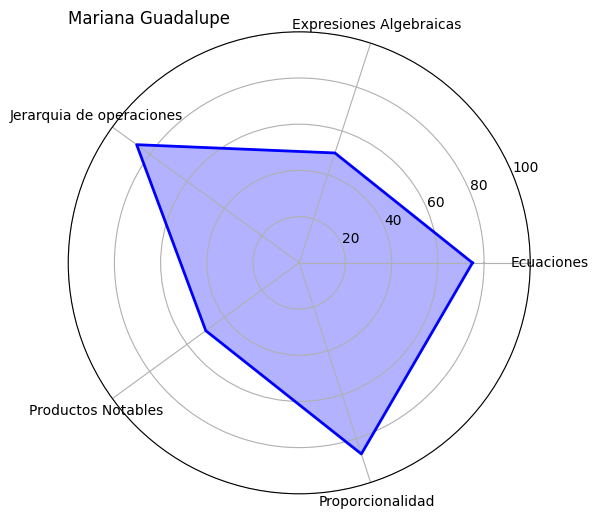

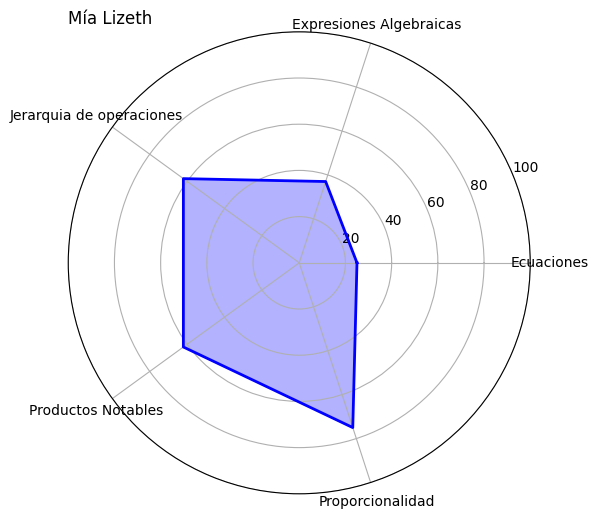

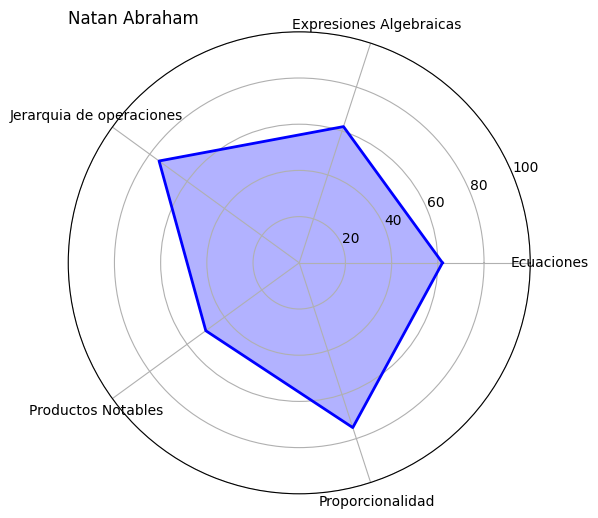

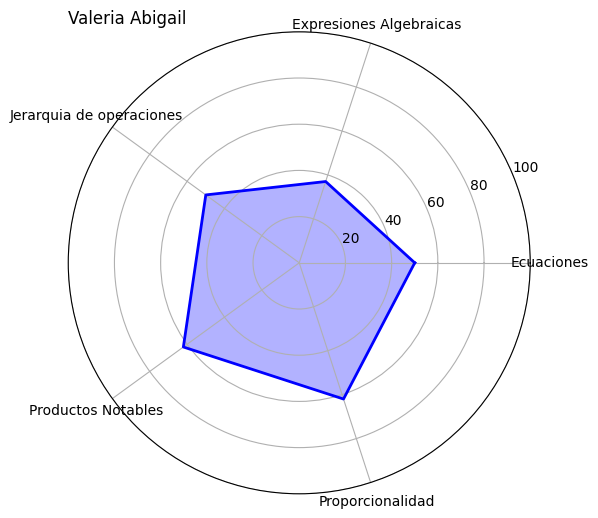

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las categorías
nombres = nombre_etiqueta["Nombre"].unique()
categorias = nombre_etiqueta["Etiqueta"].unique()
valores = {i: [] for i in nombres}  # Valores de cada categoría

for nombre in nombres:
  for categoria in categorias:
    value = nombre_etiqueta.loc[nombre_etiqueta['Nombre'] == nombre, :]
    valores[nombre].append(int(value.loc[value.Etiqueta == categoria, "Porcentaje"]))

for nombre in nombres:
  web_grafic(categorias, valores[nombre], nombre)

In [33]:
value

,Nombre,Etiqueta,Resultado,Cantidad,Porcentaje
0,Diego,Ecuaciones,4,8,50.0
1,Diego,Expresiones Algebraicas,4,8,50.0
2,Diego,Jerarquia de operaciones,8,8,100.0
3,Diego,Productos Notables,6,8,75.0
4,Diego,Proporcionalidad,7,8,87.5
